## Assignment 2 Numpy and pandas

This assignment will contain 3 questions with details as below. The due date is October 5 (Friday), 2020 23:59PM. Each late day will result in 20% loss of total points.

### Question 1 (30 points) Just another ordinary yet least square

Every college student with a bueinsess degree may know linear regression pretty well. Essentially, linear regression models the linear regression between a scalar variable (dependent variable) and a list of independent variables in matrix notation as:

\begin{equation}
\mathbf{y} = X\boldsymbol\theta + \boldsymbol\varepsilon
\end{equation}


Ordinary least squares (OLS) allows to find the value of $\theta$ as a *closed-form solution* —in other words, a mathematical equation that gives the result directly. This is called
the *Normal Equation*:

\begin{equation}
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^T\cdot y
\end{equation}

This is how the data is generated as:
    
\begin{equation}
\textbf{y} = 4 + 3*\textbf{X_1} + 2*\textbf{X_2} + 10*\textbf{X_3} + \epsilon
\end{equation}

In [ ]:
import numpy as np
X_1 = 2 * np.random.rand(10000, 1)
X_2 = 5 * np.random.rand(10000, 1)
X_3 = 6 * np.random.rand(10000, 1)
y = 4 + 3 * X_1 + 2 * X_2 + 10 * X_3 + np.random.randn(10000, 1)
X_b = np.c_[np.ones((10000, 1)), X_1, X_2, X_3]

**Question 1.1** (5 points): Load the data from ```independent_variable.npy``` and ```dependent_variable.npy```, and list the dimensions of the independent variables and dependent variable, respectively.

In [ ]:
X = np.load("independent_variable.npy")
y = np.load("dependent_variable.npy")

In [ ]:
ndim_iv = X.ndim
ndim_dv = y.ndim

nsize_iv = X.shape
nsize_dv = y.shape

In [ ]:
print("The independent variable has {} dimensions with \
{} rows and {} columns".format(ndim_iv, nsize_iv[0], nsize_iv[1]))
print("The dependent variable has {} dimensions with \
{} rows and {} columns".format(ndim_dv, nsize_dv[0], nsize_dv[1]))

The independent variable has 2 dimensions with 10000 rows and 4 columns
The dependent variable has 2 dimensions with 10000 rows and 1 columns


**Question 1.2** (15 points) Now implement the normal equation of Ordinary Least Squres using numpy to estimate the $\theta$. Show the estimated value of $\theta$. Also perform the Least Squares using ```numpy.linalg.lstsq ``` function, check whether estimated $\theta$ from your own implementation is equal to the estimated value of polynomial regression.

We perform the closed_form solution using numpy as:

In [ ]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([[4.08641938],
       [2.98910419],
       [1.98161519],
       [9.99036667]])

Recall our data generation function, the esitmated coefficient is quite close.

Also, you can use the least squared method in numpy to validate the result:

In [ ]:
theta_best, _, _, _ = np.linalg.lstsq(X, y)
theta_best

/opt/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[4.08641938],
       [2.98910419],
       [1.98161519],
       [9.99036667]])

**Question 1.3** (10 points) Now use the estimated $\theta$ to *predict* the value of $y$ using the equation:

\begin{equation}
\mathbf{\hat{y}} = X\hat{\boldsymbol\theta}
\end{equation}

Calculate the prediction errors the linear regression model has made between the $\hat{y}$ and $y$ as:

\begin{equation}
\mathbf{E} = \sum_{j=0}^n |\hat{y}_j - y_j|^2/n
\end{equation}


In [ ]:
y_hat = np.dot(X, theta_best)
y_hat

array([[63.5448663 ],
       [39.56120933],
       [45.08901169],
       ...,
       [38.4794369 ],
       [42.57447989],
       [17.85555611]])

Using numpy element-wise operation, it is rather easy to calculate the mean squared error as:

In [ ]:
print("The mean squared error that model prediction \
has is: {}".format(np.sum(np.square(np.abs(y-y_hat)))/len(y)))

The mean squared error that model prediction has is: 1.0116412747814476


There is a typo in the MSE function, and it is ok if you did not divide by the number of elements in the array. 

### Question 2 (30 points)  Is it Instagrammable?

Consider any photo you take at Carcavelos beach:

![carcavelos](https://www.cm-oeiras.pt/pt/descobrir/patrimonio/PublishingImages/Paginas/fortesaojuliaobarra/CM145328.JPG)

<br>

An image is composed of three matrixes, each one for an RGB (red, green and blue) channel. Each matrix has values between 0 and 255.


![image](https://static.packt-cdn.com/products/9781789613964/graphics/e91171a3-f7ea-411e-a3e1-6d3892b8e1e5.png)

On this exercise, you will apply a filter to the image in a process called convolution. This process uses the filter as a matrix that is multiplied as a sliding window to an image. On the following animation, the filter is represented as yellow, the image channel as green, and the convolution result as red.

![convolution](https://icecreamlabs.com/wp-content/uploads/2018/08/33-con.gif)


Note that the resulted matrix has a smaller shape than the original, to ensure the same shape consider a padding with value 0 that enables the filter to slide throw every pixel value as shown in the following image:

<br>

![padding](https://media5.datahacker.rs/2018/11/sl_1.png)

<br><br>

This question requires the `numpy` and `Pillow` libraries that may already be installed on your enviroment. However, if you have a problem importing this libraries, install it via pip. Example for Pillow: `pip install Pillow` 

<br>

Consider the following code to convert an image into a numpy array:

```python
from PIL import Image
from numpy import asarray

# load the image
image = Image.open('carcavelos.jpg')

# convert image to numpy array
data = asarray(image)
```



You can save a numpy array as an image with the following code:

```python
"""
color image
"""

# convert numpy array to image
img = Image.fromarray(data, 'RGB')

# save image and .png
img.save('image.png')

"""
grayscale image
"""

# convert numpy array to image
data = data.astype(np.uint8)
img = Image.fromarray(data)

# save grayscale image as .png
img.save('image.png')
```

Answer the following questions:

**Question 2.1** (5 points) What is the shape of the image? Answer with the shape and indicate what each dimension represents.

In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np

# load the image
image = Image.open('carcavelos.jpg')

# convert image to numpy array
data = asarray(image)


# get shape
print(data.shape)

# explain
text = """
The first dimension represents the height (number of rows) of the image
The second dimension the width (number of columns) of the image
The third dimension the RGB color channels
"""
print(text)


(816, 1226, 3)

The first dimension represents the height (number of rows) 
The second dimension the width (number of columns)
The third dimension the RGB color channels



**Question 2.2** (10 points) Save the "carcavelos.jpg" image as a grayscale image into "carcavelos-grayscale.png". The image should result from a numpy array with only one channel instead of 3, consider the following weights for each channel: 0.30*R + 0.59*G + 0.11*B

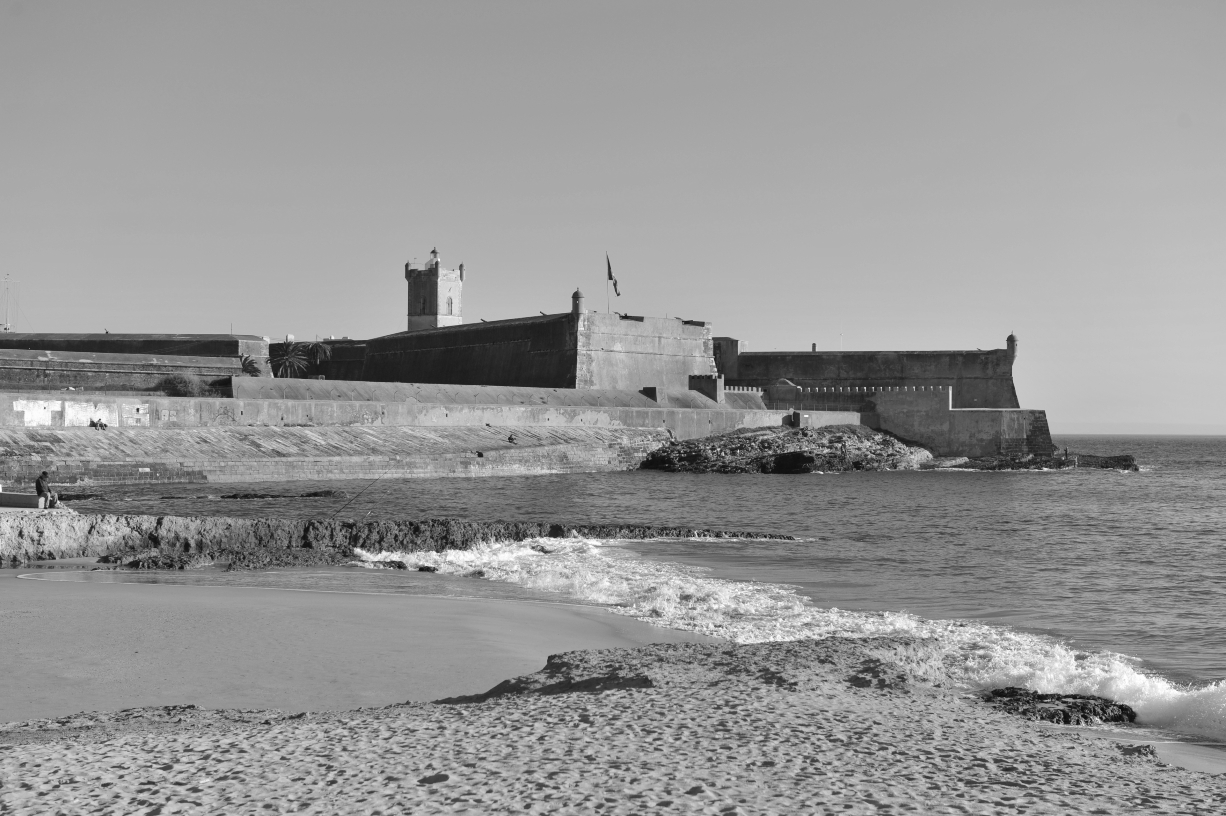

In [ ]:
# apply weights
grayscale = 0.30 * data[:,:,0] + 0.59 * data[:,:,1] + 0.11 * data[:,:,2]

# convert numpy array to image
grayscale = grayscale.astype(np.uint8)
img = Image.fromarray(grayscale)
 
# save grayscale image as .png
img.save('grayscale.png')

# optional
from IPython.display import Image
Image(filename='grayscale.png') 

**Question 2.3** (15 points) Apply convolution operations as described above to "carcavelos.jpg". 
1. Save an image into "carcavelos-sharpen.png" with the applied filter: `np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])`
2. Save an image into "carcavelos-blur.png" with the applied filter: `np.array([[1,1,1],[1,1,1],[1,1,1]])/9`

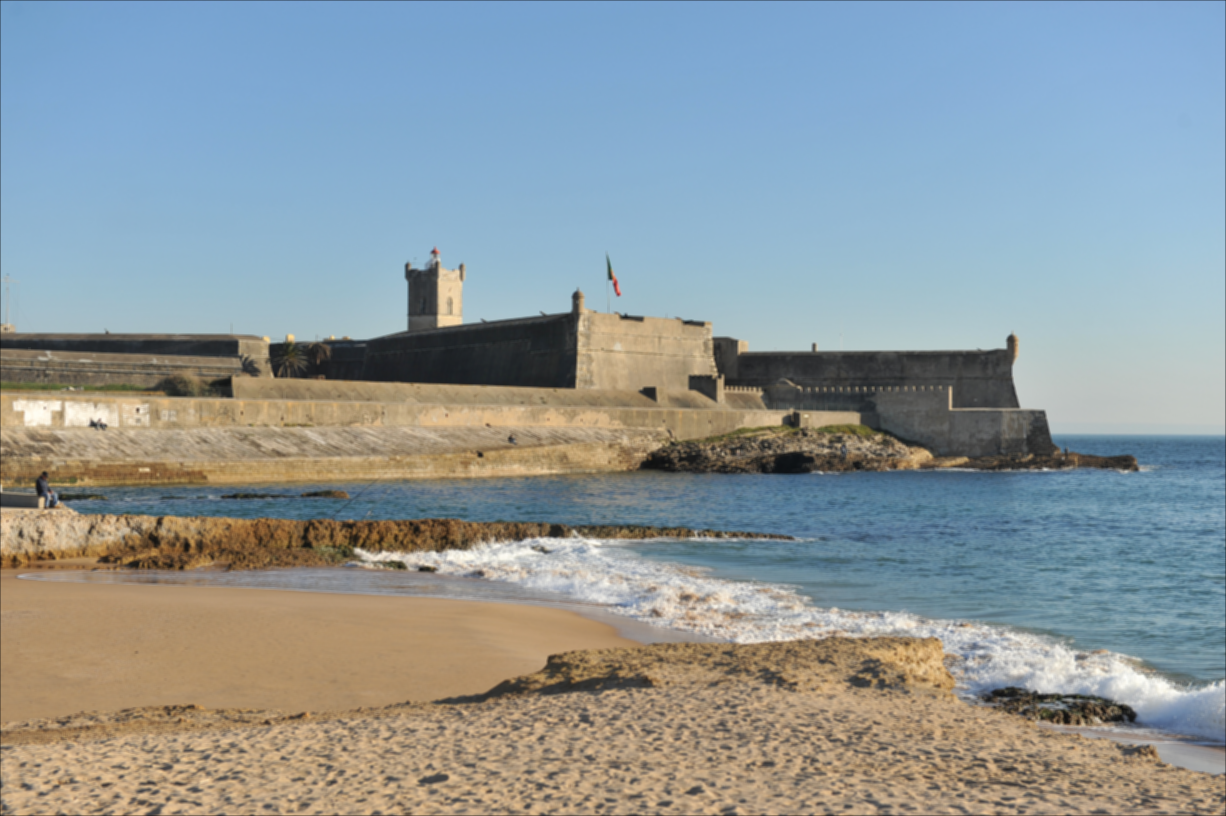

In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np

# load the image
image = Image.open('carcavelos.jpg')

# convert image to numpy array
data = asarray(image)


def convolution(image, filter, filename):
    # set filter width
    filter_len = filter.shape[0] # will be 3

    # get shape
    y, x, z = image.shape

    # create image with padding
    origin = []
    for i in range(3):
      origin.append(np.pad(image[:,:,i],1))
    
    origin = np.dstack(origin)
    
    # set result image
    new_image = np.zeros(image.shape)

    # convolution
    for k in range(z):
      for i in range(0,y):
          for j in range(0,x):
            region_of_interest = origin[i:i+filter_len, j:j+filter_len,k]
            new_image[i][j][k] = np.sum(region_of_interest * filter)

    # convert to values between 0 and 255
    new_image = np.where(new_image > 255, 255, new_image)
    new_image = np.where(new_image < 0, 0, new_image)
    
    # save image
    img = Image.fromarray(new_image.astype('uint8'), 'RGB')
    img.save(filename)


# sharp filter
sharp_filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#convolution(data, sharp_filter, "carcavelos-sharpen.png")

# blur filter
blur_filter = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
convolution(data, blur_filter, "carcavelos-blur.png")


# optional, display image
from IPython.display import Image
Image(filename='carcavelos-blur.png') 

### Question 3 My Heart Will Go On (40 points) 

![](https://camo.githubusercontent.com/78ca11f9a2e6c36bbee928124a7d3f9abc3abb2b/68747470733a2f2f696d672d73332e6f6e6564696f2e636f6d2f69642d3537616336353563393365613835613733323935343639652f7265762d302f7261772f732d613730613530323939633033303464336535383266356230373338613366653730396533613564662e6a7067)

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.  Incorporating both historical and fictionalized aspects, the film Titanic is a 1997 American epic romance and disaster film based on accounts of the sinking of the RMS Titanic directed, written, co-produced, and co-edited by James Cameron, and stars Leonardo DiCaprio and Kate Winslet as members of different social classes who fall in love aboard the ship during its ill-fated maiden voyage.

**Titanic dataset (titanic.csv)**
The titanic.xlsx contains list of detailed passenger information aboard with the description in the data dictionary as below.

Data Dictionary 

| Variable        | Definition           | Key  |
| ------------- |:-------------:| -----:|
| survived      | Survival | 0 = No, 1 = Yes |
| pclass      | Ticket class      |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex         | Gender   |      |
| age | Age in years      |     |
| sibsp | # of siblings / spouses aboard the Titanic      |   Sibling = brother, sister Spouse = husband, wife |
| parch | # of parents / children aboard the Titanic      |     |
| fare | Passenger fare      |     |
| cabin | Cabin number      |     |
| embarked | Port of Embarkation     |   C = Cherbourg, Q = Queenstown, S = Southampton  |
| class | Class of tickets      |  First, Second, Third class   |
| who   | Identity              |  man, woman, child            |
| adult_male |  Is male adult or not | Ture, False              |
| embark_town | The town of embarkation  | Cherbourg, Queenstown, Southampton |
| alive       | same as the survived  | no, yes |
| alone       | Is alone or not       | True, False |


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers. 

**Question 3.1** (10 points)

Read the `titanic.csv` and shows how many passnegers records in the data.

Due to the errors in the history archives, there are several problems you need to address first in order to obtain the correct data:

1. In the column of *`sibsp`*, the value of 1 is mistakenly recorded as -1
2. In the column of *`survived`*, the value of 0 is mistakenly recorded as NaN

In [ ]:
import pandas as pd
titanic = pd.read_csv('titanic.csv', skiprows=14)
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# replace error value in sibsp to 1
titanic['sibsp'].replace(-1, 1, inplace=True)

# fill the na value in survived with 0
titanic['survived'].fillna(0, inplace=True)

print("There are in total {} passneger records".format(titanic.shape[0]))

There are in total 891 passneger records


**Question 3.2** (5 points) Show how many male and female passengers in terms of percentage:

In [ ]:
titanic['sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

**Question 3.3** (5 points) 
Show the average number of siblings/spouses for passengers embarked from Southampton

In [ ]:
titanic.loc[titanic['embark_town'] == 'Southampton']['sibsp'].mean()

0.5714285714285714

**Question 3.4** (5 points) Show the median age of passengers that are adult male:

In [ ]:
titanic.loc[titanic['adult_male'] == 1]['age'].median()

30.0

**Question 3.5** (5 points) Show the mean difference of fares between First Class passengers and Third Class passengers: 

In [ ]:
titanic.loc[titanic['class'] == 'First']['fare'].mean() - titanic.loc[titanic['class'] == 'Third']['fare'].mean()

70.479137398167

**Question 3.6** (5 points) Show the survival status of passengers with the top 10 highest fare:

In [ ]:
titanic.loc[titanic['adult_male'] == 1].sort_values('fare', ascending=False).head(10)[['fare', 'alive']]

,fare,alive
679,512.3292,yes
737,512.3292,yes
27,263.0000,no
438,263.0000,no
118,247.5208,no
557,227.5250,no
527,221.7792,no
377,211.5000,no
332,153.4625,no
373,135.6333,no


**Question 3.7** (5 points)
Show the survival rate of men, women and children, respectively:

In [ ]:
who_counts = titanic[['who', 'survived']].value_counts(normalize=True).reset_index().rename(columns={0: 'ratio'})
who_counts

,who,survived,ratio
0,man,0,0.503928
1,woman,1,0.230079
2,man,1,0.098765
3,woman,0,0.074074
4,child,1,0.054994
5,child,0,0.038159


In [ ]:
who_counts.loc[who_counts.survived==1].rename(columns={'ratio':'survival_rate'})[['who', 'survival_rate']]

,who,survival_rate
1,woman,0.230079
2,man,0.098765
4,child,0.054994
